2025-03-28 13:50:43.768555: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 13:50:43.799563: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-28 13:50:44.176977: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-28 13:50:44.385897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743169844.655078   36031 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743169844.76

(50000, 32, 32, 3) (10000, 32, 32, 3)


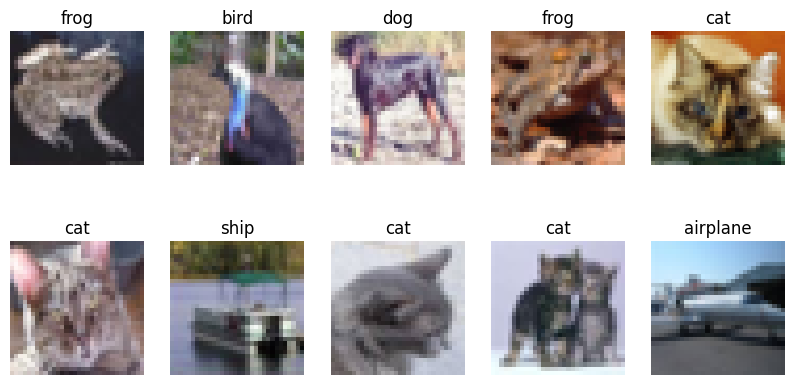

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-28 13:51:03.084116: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.2918 - loss: 1.9013 - val_accuracy: 0.5122 - val_loss: 1.3354
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.5239 - loss: 1.3336 - val_accuracy: 0.6028 - val_loss: 1.1101
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.6007 - loss: 1.1194 - val_accuracy: 0.6664 - val_loss: 0.9568
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.6536 - loss: 0.9831 - val_accuracy: 0.6919 - val_loss: 0.8836
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6959 - loss: 0.8720 - val_accuracy: 0.7094 - val_loss: 0.8364
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.7207 - loss: 0.7999 - val_accuracy: 0.7295 - val_loss: 0.7691
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7472 - loss: 0.7216 - val_accuracy: 0.7247 - val_loss: 0.7793
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.7669 - loss: 0.6595 - 

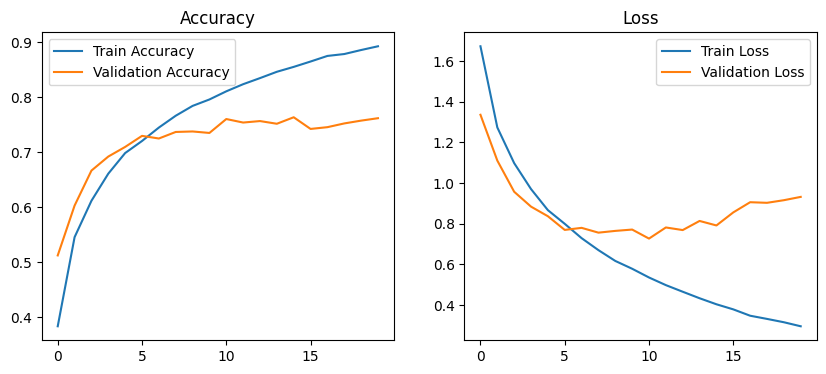

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1000
           1       0.85      0.89      0.87      1000
           2       0.67      0.64      0.65      1000
           3       0.54      0.62      0.58      1000
           4       0.71      0.73      0.72      1000
           5       0.68      0.66      0.67      1000
           6       0.80      0.82      0.81      1000
           7       0.85      0.76      0.81      1000
           8       0.84      0.88      0.86      1000
           9       0.83      0.82      0.82      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



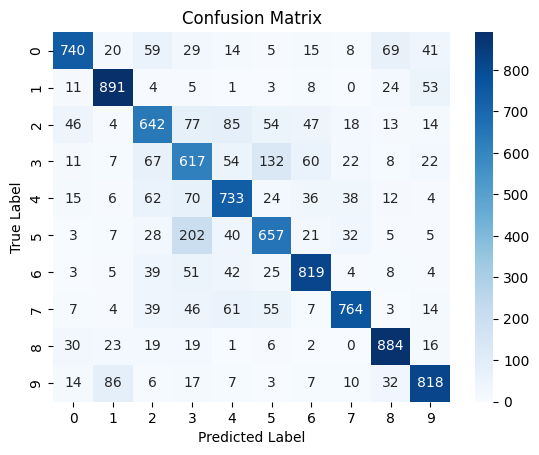

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)  # (50000, 32, 32, 3) (10000, 32, 32, 3)

# Data Preprocessing
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA)
def plot_sample_images():
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_train[i])
        plt.title(class_names[np.argmax(y_train[i])])
        plt.axis('off')
    plt.show()

plot_sample_images()

# CNN Model Definition
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Model
model = create_model()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Training Results
def plot_training_results(history):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_training_results(history)

# Predictions and Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
